# Matplotlib introduction

You've already seen this one on lecture 3, but today we'll look a little more in depth of its practical use

In [1]:
%pip install pandas openpyxl matplotlib -q

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

In [3]:
data_code = pd.read_csv("./data/CodeAndCoffeeModified.csv")
data_code.head()

,CodingHours,CoffeeCupsPerDay,CoffeeTime,CodingWithoutCoffee,CoffeeType,CoffeeSolveBugs,Gender,AgeRange
0,8,2,Before coding,Yes,Caffè latte,Sometimes,Female,18 to 29
1,3,2,Before coding,Yes,Americano,Yes,Female,30 to 39
2,5,3,While coding,No,Nescafe,Yes,Female,18 to 29
3,10,3,While coding,Sometimes,Turkish,No,Male,18 to 29
4,8,2,While coding,Sometimes,Nescafe,Yes,Male,30 to 39


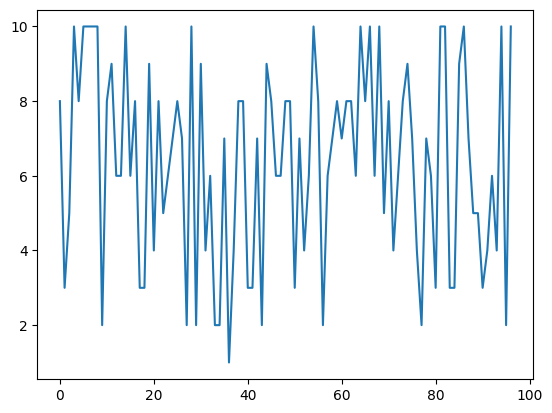

In [4]:
fig, ax = plt.subplots()
ax.plot(data_code["CodingHours"])
# fig.show()       # Redundant in Jupyter Notebooks, but may be required in scripts to show the plot

### Plots are best used to show variation over time

But for other kinds of variations we can use **scatter** graphs

Text(0, 0.5, 'Coffee Type')

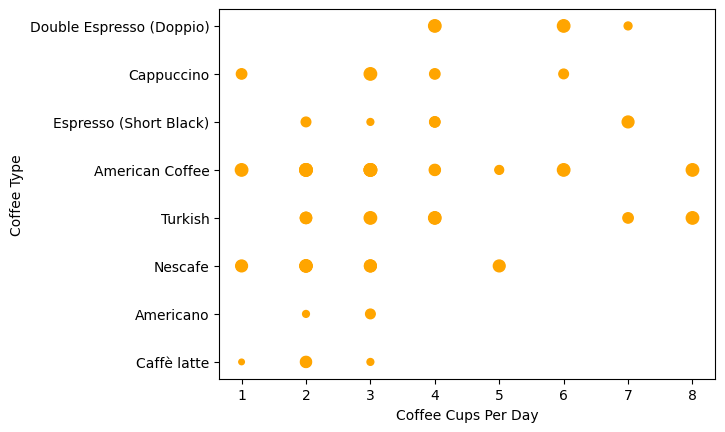

In [5]:
fig, ax = plt.subplots()

ax.scatter(             # Shows data of TWO axes as scattered dots
    data_code["CoffeeCupsPerDay"],          # x axis
    data_code["CoffeeType"],                # y axis
    s=(data_code["CodingHours"]*8),         # Size of dots
    c="orange"                              # Color. Can be mapped to an array like size
)

ax.set_xlabel("Coffee Cups Per Day")
ax.set_ylabel("Coffee Type")

Most hard-working coders drink American coffee, Turkish coffee and Nescafe. Most drinking people choose American or Turkish coffee. *How do latter even sleep at night?*

### You can also create plots implicitly without calling ax

In [6]:
data_sales = pd.read_csv("./data/coffee_prices/coffee-prices-historical-data.csv")

data_sales = data_sales[:12000]

In [7]:
data_sales["date"] = pd.to_datetime(data_sales["date"], format="ISO8601")   # Adjust date format for comfortable plotting

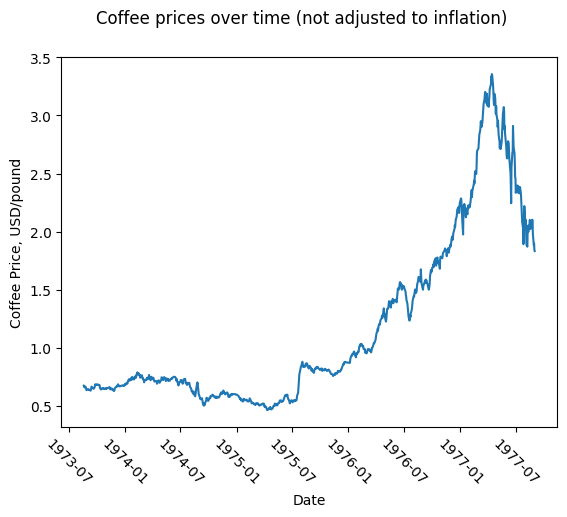

In [8]:
plt.plot(data_sales["date"][:1000], data_sales[" value"][:1000])

plt.xlabel("Date")
plt.ylabel("Coffee Price, USD/pound")

plt.suptitle("Coffee prices over time (not adjusted to inflation)")

plt.tick_params(axis='x', labelrotation=-45)

### Equivalent to this, but with less context

Matplotlib recommends that you use the latter explicit method to avoid repetition in calling the same `subplots` again and again when you need to backtrack to your older figures. [More information](https://matplotlib.org/stable/users/explain/figure/api_interfaces.html#why-be-explicit)

Though, this is mostly about using matplotlib in a script or a program and in smaller cells of your Jupyter Notebook you can use any way you want

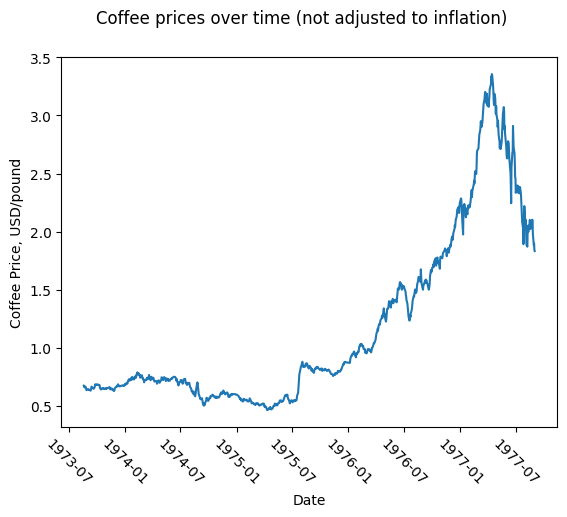

In [9]:
fig, ax = plt.subplots()

ax.plot(
    data_sales["date"][:1000],
    data_sales[" value"][:1000],
)

ax.set_xlabel("Date")
ax.set_ylabel("Coffee Price, USD/pound")

fig.suptitle("Coffee prices over time (not adjusted to inflation)")

ax.tick_params(axis='x', labelrotation=-45)

In [10]:
data_shops = pd.read_excel("./data/Coffee Shop Sales.xlsx")
data_shops.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [11]:
data_shops["transaction_date"] = pd.to_datetime(data_shops["transaction_date"], format="ISO8601")
data_shops.drop("transaction_id", axis=1, inplace=True)     # Drop useless "transaction_id" column
data_shops.head()

,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,2023-01-01,07:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2023-01-01,07:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,2023-01-01,07:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,2023-01-01,07:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,2023-01-01,07:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [12]:
data_shops = data_shops[:10000]
data_shops.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_date  10000 non-null  datetime64[ns]
 1   transaction_time  10000 non-null  object        
 2   transaction_qty   10000 non-null  int64         
 3   store_id          10000 non-null  int64         
 4   store_location    10000 non-null  object        
 5   product_id        10000 non-null  int64         
 6   unit_price        10000 non-null  float64       
 7   product_category  10000 non-null  object        
 8   product_type      10000 non-null  object        
 9   product_detail    10000 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 781.4+ KB


Text(0, 0.5, 'Transaction quantity')

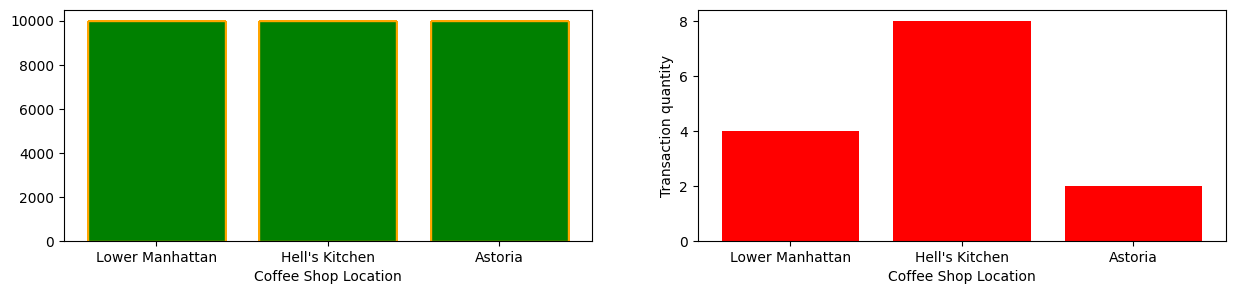

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(15, 3))

axs[0].bar(
    data_shops["store_location"],
    data_shops["store_location"].count(),
    color="green",
    edgecolor="orange",      # This is ought to look bad, but I'm willing to do it to show you the edge colors
)

axs[1].bar(
    data_shops["store_location"],
    data_shops["transaction_qty"],
    color="red",
)

axs[0].set_xlabel("Coffee Shop Location")
axs[1].set_xlabel("Coffee Shop Location")
axs[1].set_ylabel("Transaction quantity")
# axs.set_title("Coffee shops quantity vs transaction quantity")

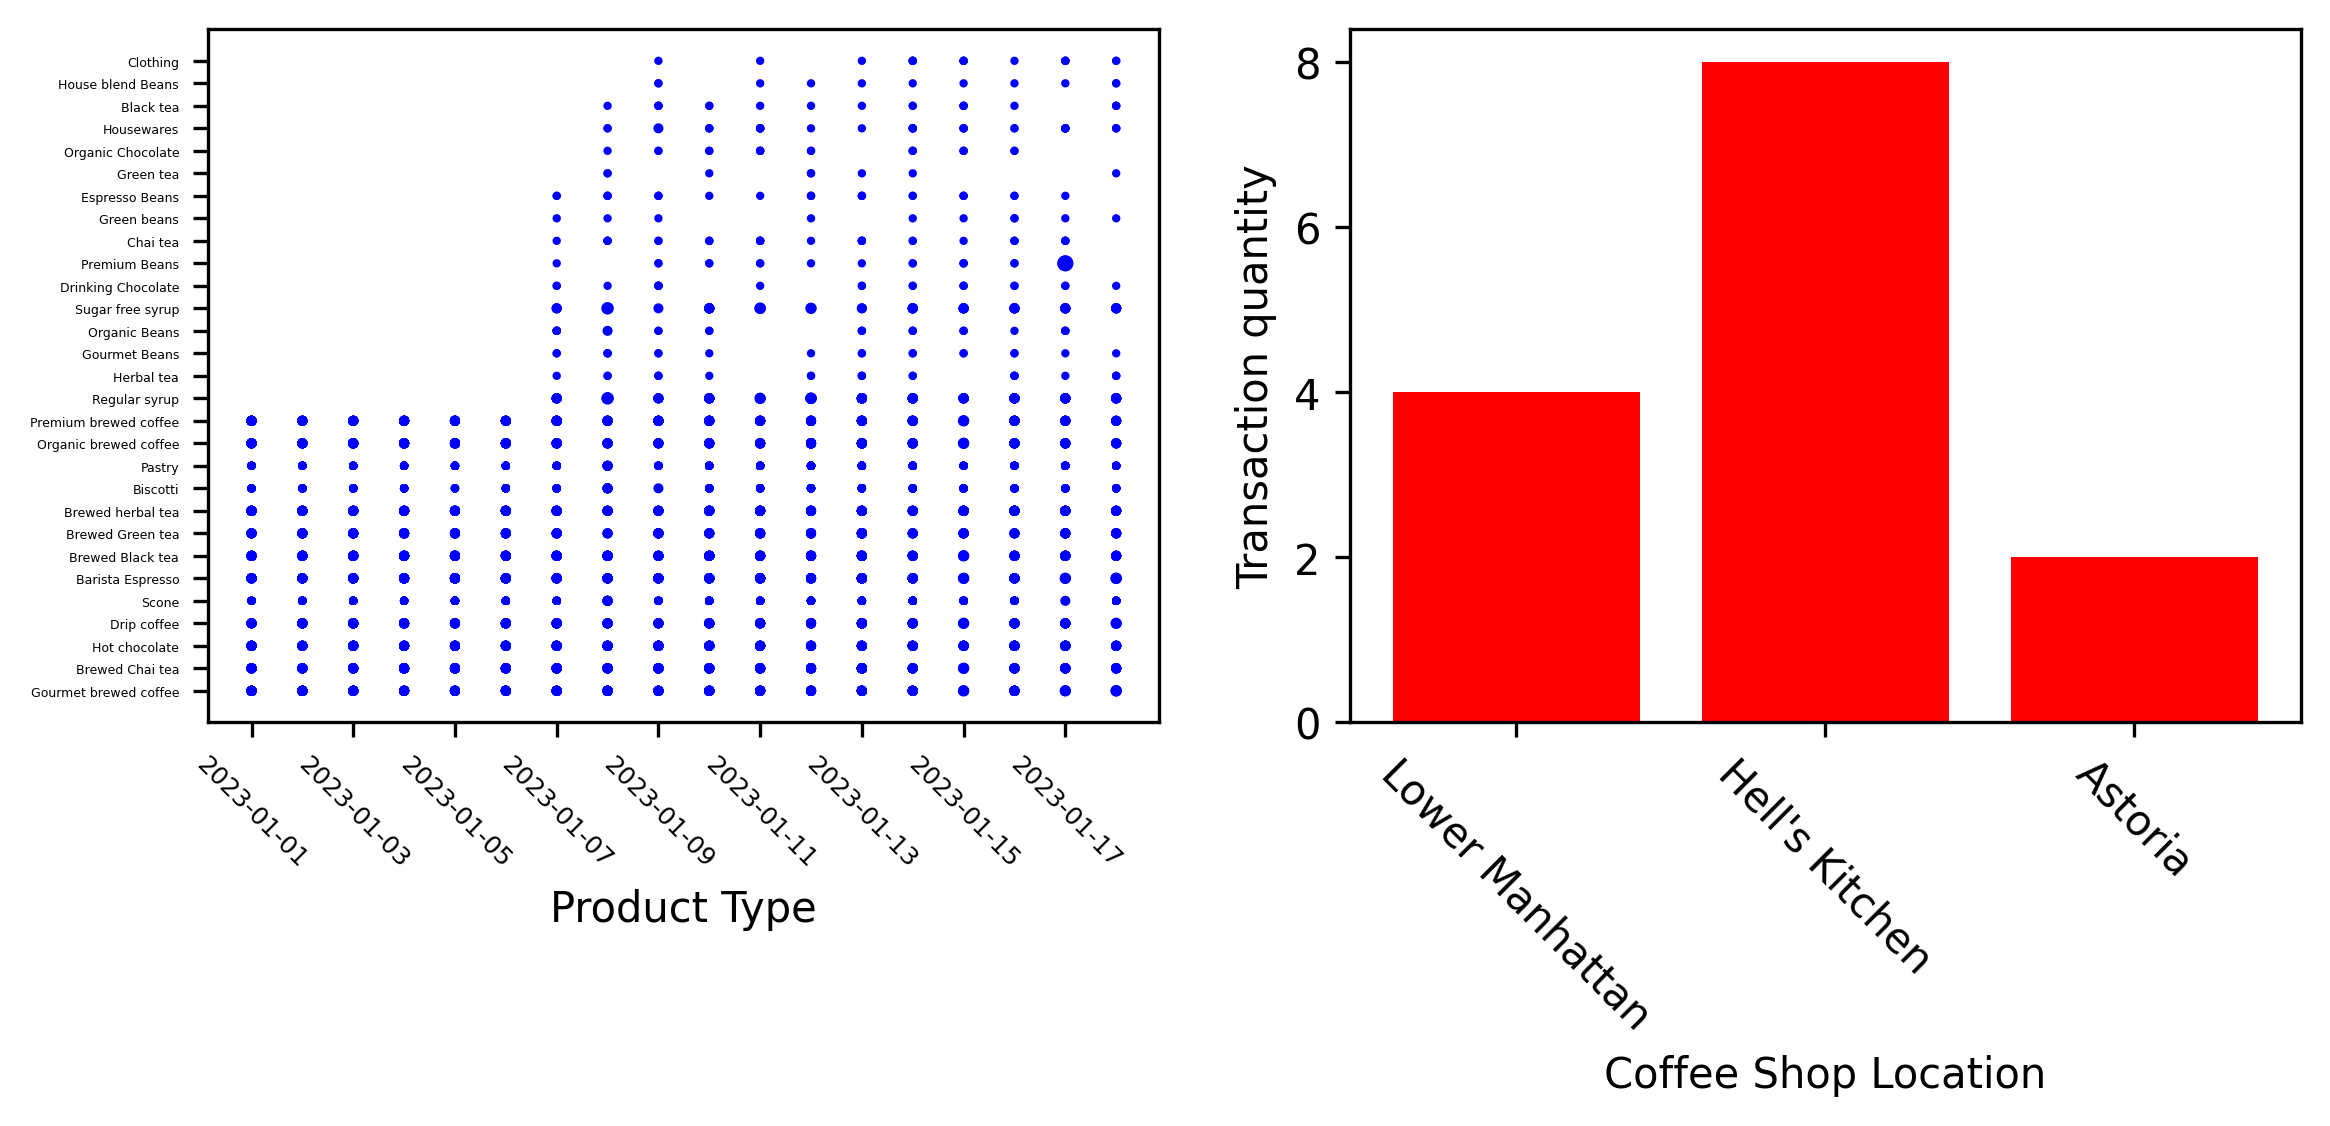

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(9, 3))
fig.dpi = 300     # Increase the resolution of the figure

axs[0].scatter(
    data_shops["transaction_date"],
    data_shops["product_type"],
    s=data_shops["transaction_qty"],
    color="blue",
)

axs[1].bar(
    data_shops["store_location"],
    data_shops["transaction_qty"],
    color="red",
)

axs[0].set_xlabel("Product Type")
axs[1].set_xlabel("Coffee Shop Location")
axs[1].set_ylabel("Transaction quantity")

axs[0].tick_params(
    axis="x", 
    labelrotation=-45, 
    labelsize=6, 
)
axs[0].tick_params(
    axis="y",  
    labelsize=3, 
)
axs[1].tick_params(axis='x', labelrotation=-45)

In [15]:
fig.savefig("./CoffeeShopReport.png", dpi=300)

#### Set a colormap from plots

In [16]:
from matplotlib import colormaps
list(colormaps)

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'grey',
 'gist_grey',
 'gist_yerg',
 'Grays',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viri

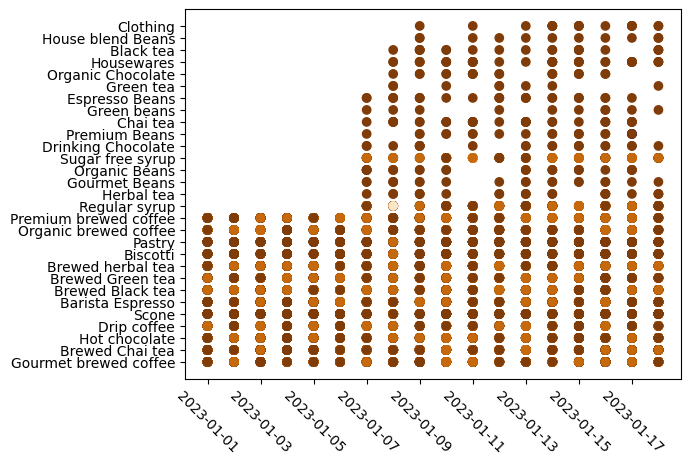

In [25]:
fig, ax = plt.subplots()

ax.scatter(
    data_shops["transaction_date"],
    data_shops["product_type"],
    c=data_shops["transaction_qty"],     # Set an array-like for color mapping
    cmap="PuOr",                         # Choose the color mapping
)

ax.tick_params(axis='x', labelrotation=-45)

#### Mosaic of subplots

Text(0.5, 1.0, 'right')

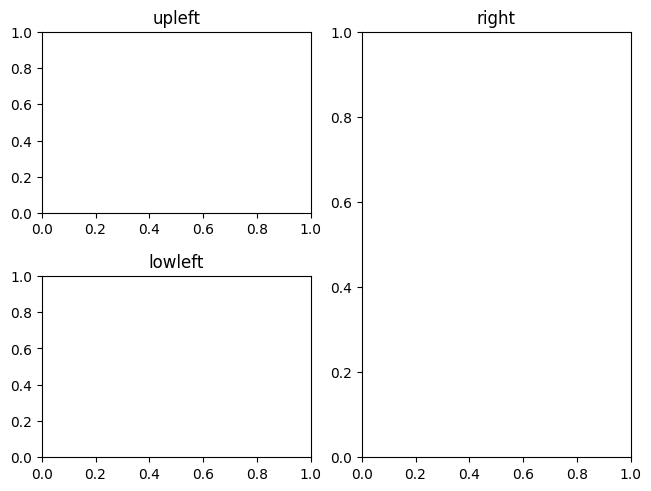

In [17]:
fig, axd = plt.subplot_mosaic([['upleft', 'right'],
                               ['lowleft', 'right']], layout='constrained')
axd['upleft'].set_title('upleft')
axd['lowleft'].set_title('lowleft')
axd['right'].set_title('right')